In [83]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("final_clean.csv")

In [90]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [91]:
df

Season                 Name Transfer Sum             From  FromCountry  \
0     20/21        Arthur Cabral  4,40 Mio. €        Palmeiras       Brazil   
1     20/21            Kaly Sene  4,00 Mio. €     Juventus U19        Italy   
2     20/21        Edon Zhegrova  3,00 Mio. €        KRC Genk       Belgium   
3     20/21        Andrea Padula   450 Tsd. €      FC Wil 1900  Switzerland   
4     20/21        Heinz Lindner   ablösefrei  Wehen Wiesbaden      Germany   
...     ...                  ...          ...              ...          ...   
4023  11/12  Mickaël Facchinetti        Leihe        FC Lugano  Switzerland   
4024  11/12       Palmiro Di Dio            -        FC Lugano  Switzerland   
4025  11/12       Patrice Feussi            -        FC Lugano  Switzerland   
4026  11/12          Rijat Shala            -        FC Lugano  Switzerland   
4027  11/12       Fabio Liverani            -        FC Lugano  Switzerland   

     FromLanguage FromLanguageFamily             To     ToCountry  \
0      Portuguese            Romance       FC Basel   Switzerland   
1         Italian            Romance       FC Basel   Switzerland   
2          French            Romance       FC Basel   Switzerland   
3          German           Germanic       FC Basel   Switzerland   
4          German           Germanic       FC Basel   Switzerland   
...           ...                ...            ...           ...   
4023      Italian            Romance  Chievo Verona         Italy   
4024      Italian            Romance  FC Lugano U21   Switzerland   
4025      Italian            Romance     Vereinslos    Vereinslos   
4026      Italian            Romance     Vereinslos    Vereinslos   
4027      Italian            Romance   Karriereende  Karriereende   

        ToLanguage ToLanguageFamily  
0           German         Germanic  
1           German         Germanic  
2           German         Germanic  
3           German         Germanic  
4           German         Germanic  
...            ...              ...  
4023       Italian          Romance  
4024       Italian          Romance  
4025    Vereinslos       Vereinslos  
4026    Vereinslos       Vereinslos  
4027  Karriereende     Karriereende  

[4028 rows x 11 columns]

### Creating different ID's

In [92]:
ids = []
clubs = []
for i , club in enumerate(pd.concat([df['To'],df['From']]).unique()):
    ids.append(i)
    clubs.append(club)
    
df_club_id_from = pd.DataFrame({'id_From': ids, 'From':clubs})    
df_club_id_to = pd.DataFrame({'id_To': ids, 'To':clubs})

In [94]:
idLF = []
LF = []
for i , LaF in enumerate(pd.concat([df['ToLanguageFamily'],df['FromLanguageFamily']]).unique()):
    idLF.append(i)
    LF.append(LaF)
    
df_LF_id_from = pd.DataFrame({'id_FromLF': idLF, 'FromLanguageFamily':LF})    
df_LF_id_to = pd.DataFrame({'id_ToLF': idLF, 'ToLanguageFamily':LF})

In [95]:
idL = []
L = []
for i , La in enumerate(pd.concat([df['ToLanguage'],df['FromLanguage']]).unique()):
    idL.append(i)
    L.append(La)
    
df_L_id_from = pd.DataFrame({'id_FromL': idL, 'FromLanguage':L})    
df_L_id_to = pd.DataFrame({'id_ToL': idL, 'ToLanguage':L})

In [96]:
df_temp = pd.merge(df, df_club_id_from , how = 'inner', on='From')

In [97]:
df_temp = pd.merge(df_temp, df_club_id_to , how = 'inner', on='To')

In [98]:
df_temp = pd.merge(df_temp, df_LF_id_from , how = 'inner', on='FromLanguageFamily')

In [99]:
df_temp = pd.merge(df_temp, df_LF_id_to , how = 'inner', on='ToLanguageFamily')

In [100]:
df_temp = pd.merge(df_temp, df_L_id_from , how = 'inner', on='FromLanguage')

In [101]:
df_temp = pd.merge(df_temp, df_L_id_to , how = 'inner', on='ToLanguage')

In [102]:
df_temp

Season              Name Transfer Sum                     From  \
0     20/21     Arthur Cabral  4,40 Mio. €                Palmeiras   
1     19/20           Ramires        Leihe                 EC Bahia   
2     14/15   Derlis González  3,00 Mio. €                  Benfica   
3     14/15      Adama Traoré  1,50 Mio. €           Vit. Guimarães   
4     19/20            Nathan   ablösefrei                Palmeiras   
...     ...               ...          ...                      ...   
4023  12/13  Heinz Barmettler   ablösefrei                FC Zürich   
4024  18/19       Marko Devic   ablösefrei                 FC Vaduz   
4025  12/13    Bruno Bertucci            ?  Grasshopper Club Zürich   
4026  20/21      Levin Wanner   ablösefrei                  FC Thun   
4027  12/13   Charyl Chappuis            ?  Grasshopper Club Zürich   

      FromCountry FromLanguage FromLanguageFamily            To    ToCountry  \
0          Brazil   Portuguese            Romance      FC Basel  Switzerland   
1          Brazil   Portuguese            Romance      FC Basel  Switzerland   
2        Portugal   Portuguese            Romance      FC Basel  Switzerland   
3        Portugal   Portuguese            Romance      FC Basel  Switzerland   
4          Brazil   Portuguese            Romance     FC Zürich  Switzerland   
...           ...          ...                ...           ...          ...   
4023  Switzerland       German           Germanic    Inter Baku   Azerbaijan   
4024  Switzerland       German           Germanic      Sabah FK   Azerbaijan   
4025  Switzerland       German           Germanic  Neftchi Baku   Azerbaijan   
4026  Switzerland       German           Germanic           FCI      Estonia   
4027  Switzerland       German           Germanic  Buriram Utd.     Thailand   

       ToLanguage ToLanguageFamily  id_From  id_To  id_FromLF  id_ToLF  \
0          German         Germanic      613      0          1        0   
1          German         Germanic       22      0          1        0   
2          German         Germanic      135      0          1        0   
3          German         Germanic      629      0          1        0   
4          German         Germanic      613     98          1        0   
...           ...              ...      ...    ...        ...      ...   
4023  Azerbaijani           Turkic       98    143          0        3   
4024  Azerbaijani           Turkic       74    545          0        3   
4025  Azerbaijani           Turkic      300    351          0        3   
4026     Estonian           Finnic       39    250          0        9   
4027         Thai       Tai-Kaidai      300    352          0       17   

      id_FromL  id_ToL  
0           10       0  
1           10       0  
2           10       0  
3           10       0  
4           10       0  
...        ...     ...  
4023         0      28  
4024         0      28  
4025         0      28  
4026         0      35  
4027         0      39  

[4028 rows x 17 columns]

In [103]:
df_id = df_temp[['id_From','id_To', 'id_FromLF', 'id_ToLF', 'id_FromL', 'id_ToL']]

In [116]:
df_temp=df_temp.reset_index()
df_temp['id_ToL'].value_counts()
df_temp['id_From'].value_counts()
df_temp['id_To'].value_counts()

53     203
41     186
8      174
300    173
87     163
      ... 
157      1
163      1
165      1
167      1
612      1
Name: id_To, Length: 613, dtype: int64

In [114]:
df_temp['freq_id_ToL'] = df_temp.groupby(by='id_ToL')['id_ToL'].transform('count')
df_temp

Season              Name Transfer Sum                     From  \
0     20/21     Arthur Cabral  4,40 Mio. €                Palmeiras   
1     19/20           Ramires        Leihe                 EC Bahia   
2     14/15   Derlis González  3,00 Mio. €                  Benfica   
3     14/15      Adama Traoré  1,50 Mio. €           Vit. Guimarães   
4     19/20            Nathan   ablösefrei                Palmeiras   
...     ...               ...          ...                      ...   
4023  12/13  Heinz Barmettler   ablösefrei                FC Zürich   
4024  18/19       Marko Devic   ablösefrei                 FC Vaduz   
4025  12/13    Bruno Bertucci            ?  Grasshopper Club Zürich   
4026  20/21      Levin Wanner   ablösefrei                  FC Thun   
4027  12/13   Charyl Chappuis            ?  Grasshopper Club Zürich   

      FromCountry FromLanguage FromLanguageFamily            To    ToCountry  \
0          Brazil   Portuguese            Romance      FC Basel  Switzerland   
1          Brazil   Portuguese            Romance      FC Basel  Switzerland   
2        Portugal   Portuguese            Romance      FC Basel  Switzerland   
3        Portugal   Portuguese            Romance      FC Basel  Switzerland   
4          Brazil   Portuguese            Romance     FC Zürich  Switzerland   
...           ...          ...                ...           ...          ...   
4023  Switzerland       German           Germanic    Inter Baku   Azerbaijan   
4024  Switzerland       German           Germanic      Sabah FK   Azerbaijan   
4025  Switzerland       German           Germanic  Neftchi Baku   Azerbaijan   
4026  Switzerland       German           Germanic           FCI      Estonia   
4027  Switzerland       German           Germanic  Buriram Utd.     Thailand   

       ToLanguage ToLanguageFamily  id_From  id_To  id_FromLF  id_ToLF  \
0          German         Germanic      613      0          1        0   
1          German         Germanic       22      0          1        0   
2          German         Germanic      135      0          1        0   
3          German         Germanic      629      0          1        0   
4          German         Germanic      613     98          1        0   
...           ...              ...      ...    ...        ...      ...   
4023  Azerbaijani           Turkic       98    143          0        3   
4024  Azerbaijani           Turkic       74    545          0        3   
4025  Azerbaijani           Turkic      300    351          0        3   
4026     Estonian           Finnic       39    250          0        9   
4027         Thai       Tai-Kaidai      300    352          0       17   

      id_FromL  id_ToL  freq_id_ToL  
0           10       0         1789  
1           10       0         1789  
2           10       0         1789  
3           10       0         1789  
4           10       0         1789  
...        ...     ...          ...  
4023         0      28            3  
4024         0      28            3  
4025         0      28            3  
4026         0      35            1  
4027         0      39            1  

[4028 rows x 18 columns]

In [105]:
df_temp20 = df_temp.loc[df['Season'] == '20/21']
df_temp19 = df_temp.loc[df['Season'] == '19/20']
df_temp18 = df_temp.loc[df['Season'] == '18/19']
df_temp17 = df_temp.loc[df['Season'] == '17/18']
df_temp16 = df_temp.loc[df['Season'] == '16/17']
df_temp15 = df_temp.loc[df['Season'] == '15/16']
df_temp14 = df_temp.loc[df['Season'] == '14/15']
df_temp13 = df_temp.loc[df['Season'] == '13/14']
df_temp12 = df_temp.loc[df['Season'] == '12/13']
df_temp11 = df_temp.loc[df['Season'] == '11/12']

In [106]:
listyear = [
    'df_temp20',
    'df_temp19',
    'df_temp18',
    'df_temp17',
    'df_temp16',
    'df_temp15',
    'df_temp14',
    'df_temp13',
    'df_temp12',
    'df_temp11',
    'df_temp20',
    'df_temp19',
    'df_temp18',
    'df_temp17',
    'df_temp16',
    'df_temp15',
    'df_temp14',
    'df_temp13',
    'df_temp12',
    'df_temp11']

#### Plotting Networt to show which Teams deliver Players to which language in the Season 20/21
* Saving the plot as a .pdf-File (example: fig.savefig('network20.pdf'))

In [108]:
fig = plt.figure(figsize=(100, 100)) 
g = nx.from_pandas_edgelist(df_temp20, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.DiGraph())
nx.draw(g, with_labels = True) 
plt.axis('equal') 
plt.show()
fig.savefig('network20.pdf')

In [110]:
fig = plt.figure(figsize=(50, 50)) 

g = nx.from_pandas_edgelist(df_temp, 
                            source = 'FromLanguageFamily',
                            target = 'ToLanguageFamily',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.MultiDiGraph())
node_color = [20000.0 * g.degree() for v in g]
nx.draw(g, node_color=node_color, edge_color='black', with_labels = True, font_size=20) 
plt.axis('equal') 
plt.show()
fig.savefig('networkTestalle.pdf')

TypeError: unsupported operand type(s) for *: 'float' and 'DiMultiDegreeView'

<Figure size 3600x3600 with 0 Axes>

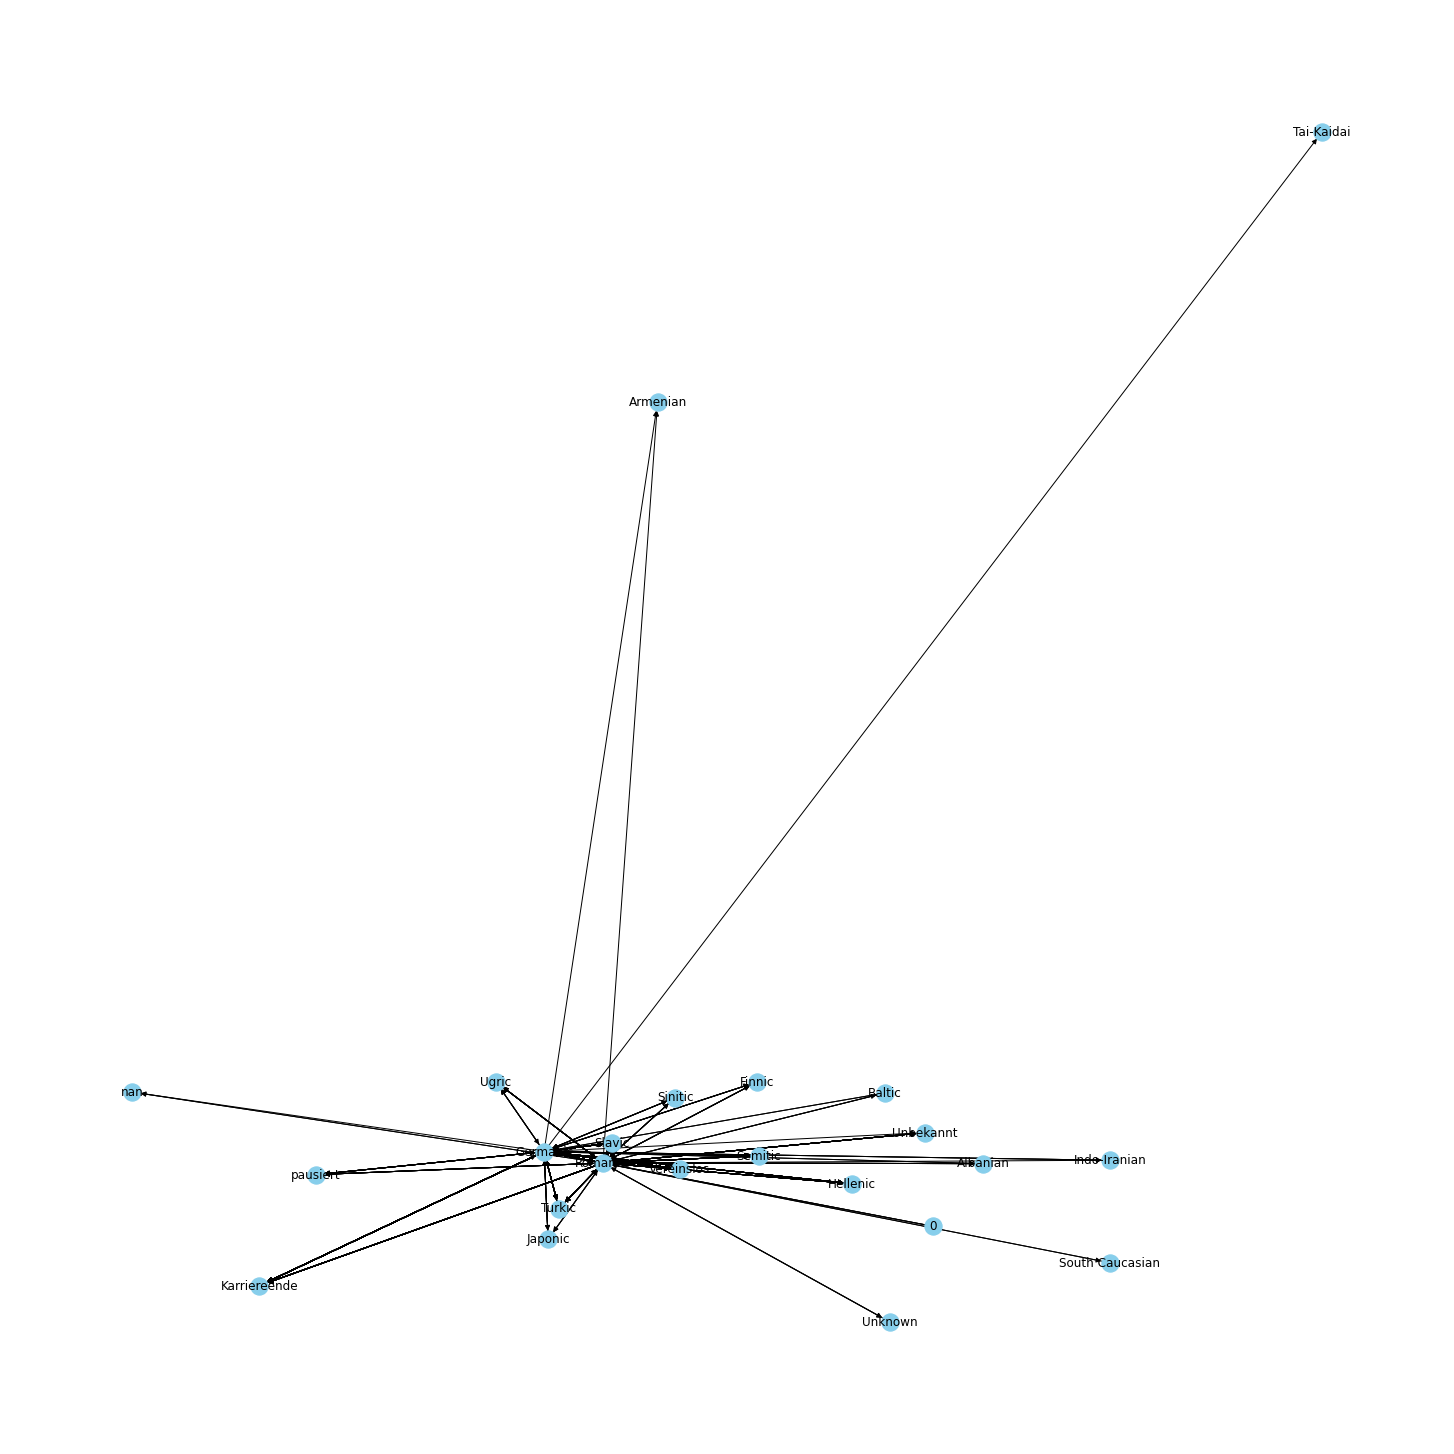

In [35]:
fig = plt.figure(figsize=(20, 20)) 

g = nx.from_pandas_edgelist(df_temp, 
                            source = 'FromLanguageFamily',
                            target = 'ToLanguageFamily',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.MultiDiGraph())

edge = df_temp20['FromLanguageFamily']
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
edge_labels = nx.get_edge_attributes(g,'edge')
nx.draw_networkx_edge_labels(g,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()
fig.savefig('networkedgelabel.pdf')

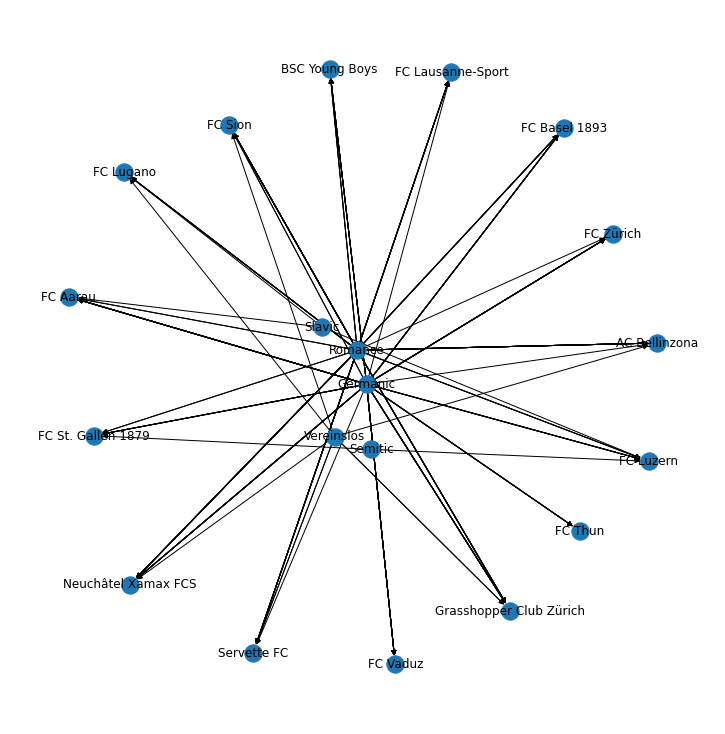

In [64]:
fig = plt.figure(figsize=(10, 10)) 
g = nx.from_pandas_edgelist(df_tempZ20, 
                            source = 'FromLanguageFamily',
                            target = 'To',
                            edge_attr = 'ToLanguageFamily',
                            create_using = nx.MultiDiGraph())
nx.draw(g, with_labels = True) 
plt.axis('scaled') 
plt.show()
fig.savefig('networkTestZ20.pdf')

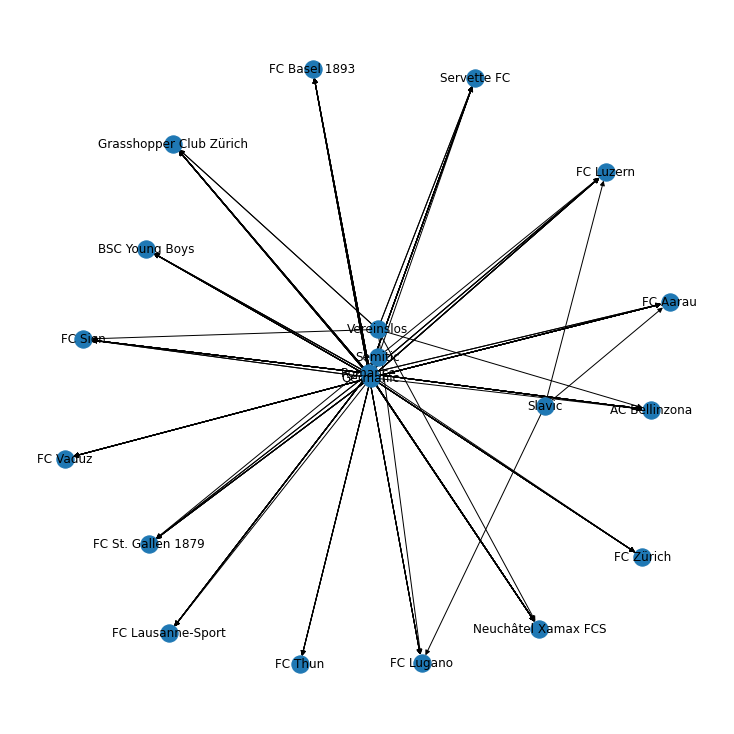

In [77]:
fig = plt.figure(figsize=(10, 10)) 
q = nx.from_pandas_edgelist(df_temp, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'ToLanguageFamily',
                            create_using = nx.Graph())
nx.draw(g, with_labels = True) 
plt.axis('equal') 
plt.show()
fig.savefig('network_all.pdf')

In [75]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Romance', 'Germanic', 'Vereinslos', 'Karriereende', 'FC Lugano']

C:\Users\ginoc\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\ginoc\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ginoc\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


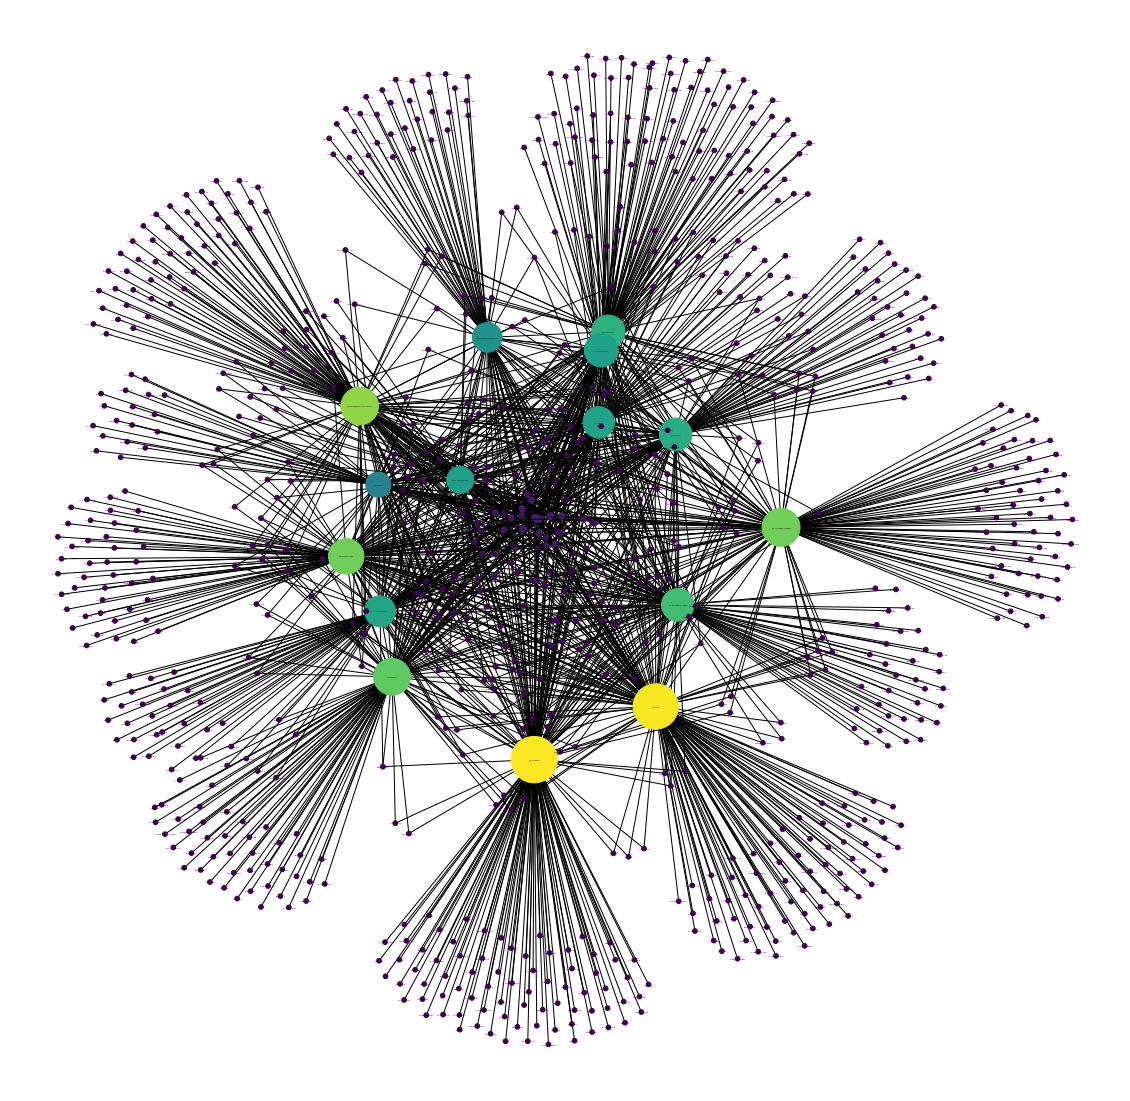

In [81]:
pos = nx.spring_layout(q)

betCent = nx.betweenness_centrality(q, normalized=True, endpoints=True)
node_color = [20000.0 * q.degree(v) for v in q]
node_size =  [v * 10000 for v in betCent.values()]
plot = plt.figure(figsize = (20,20))
nx.draw_networkx(q, pos=pos, with_labels=True,
                 font_size=2,
                 node_color=node_color,
                 node_size=node_size,
                 create_using = nx.MultiDiGraph())
plt.axis('off')
plot.savefig('network_all2.pdf')

In [49]:
 print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 904
Number of edges: 1700
Average degree:   3.7611
